In [5]:
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('roman-emperors.csv')

In [7]:
df.head()

,Index,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes,Verif,Image,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,52,Galerius,CAESAR GALERIVS VALERIVS MAXIMIANVS AVGVSTVS,0260-01-01T00:53:28+00:53,0311-05-01T00:53:28+00:53,Romuliana,Moesia Superior,Appointment by Emperor,0305-05-01T00:53:28+00:53,0311-05-01T00:53:28+00:53,Natural Causes,Disease,Constantinian,Dominate,"birth, death, reign.end are estimates",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
1,57,Lucinius,CAESAR GAIVS VALERIVS LICINIVS AVGVSTVS,0250-01-01T00:53:28+00:53,0325-03-01T00:53:28+00:53,Felix Romuliana,Moesia Superior,Birthright,0308-11-11T00:53:28+00:53,0324-09-18T00:53:28+00:53,Execution,Other Emperor,Constantinian,Dominate,"birth, death, are only estimates",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
2,33,Philip I,CAESAR MARCVS IVLIVS PHILIPPVS AVGVSTVS,0204-01-01T00:53:28+00:53,0249-10-01T00:53:28+00:53,Shahba,Syria,Seized Power,0244-02-14T00:53:28+00:53,0249-10-01T00:53:28+00:53,Execution,Other Emperor,Gordian,Principate,reign.end is only estimate,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
3,36,Trebonianus Gallus,CAESAR GAIVS VIBIVS TREBONIANVS GALLVS AVGVSTVS,0206-01-01T00:53:28+00:53,0253-08-15T00:53:28+00:53,NaN,Italia,Appointment by Army,0251-06-15T00:53:28+00:53,0253-08-15T00:53:28+00:53,Assassination,Other Emperor,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
4,31,Balbinus,CAESAR DECIMVS CAELIVS CALVINVS BALBINVS PIVS ...,0178-01-01T00:53:28+00:53,0238-07-29T00:53:28+00:53,NaN,Unknown,Appointment by Senate,0238-04-22T00:53:28+00:53,0238-07-29T00:53:28+00:53,Assassination,Praetorian Guard,Gordian,Principate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           68 non-null     int64  
 1   Name            68 non-null     object 
 2   Full Name       68 non-null     object 
 3   Birth           63 non-null     object 
 4   Death           68 non-null     object 
 5   Birth City      51 non-null     object 
 6   Birth Province  68 non-null     object 
 7   Succession      68 non-null     object 
 8   Reign Start     68 non-null     object 
 9   Reign End       68 non-null     object 
 10  Cause           68 non-null     object 
 11  Killer          68 non-null     object 
 12  Dynasty         68 non-null     object 
 13  Era             68 non-null     object 
 14  Notes           45 non-null     object 
 15  Verif           5 non-null      object 
 16  Image           68 non-null     object 
 17  Unnamed: 17     0 non-null      float

### Lo primero será ordenar los distintos emperadores por su indice, es decir, por orden cronológico en el que gobernaron:

In [9]:
df.sort_values(by='Index', inplace=True)

In [10]:
df.head()

,Index,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes,Verif,Image,Unnamed: 17,Unnamed: 18,Unnamed: 19
15,1,Augustus,IMPERATOR CAESAR DIVI FILIVS AVGVSTVS,0062-09-23T00:53:28+00:53,0014-08-19T00:53:28+00:53,Rome,Italia,Birthright,0026-01-16T00:53:28+00:53,0014-08-19T00:53:28+00:53,Assassination,Wife,Julio-Claudian,Principate,"birth, reign.start are BCE. Assign negative fo...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
8,2,Tiberius,TIBERIVS CAESAR DIVI AVGVSTI FILIVS AVGVSTVS,0041-11-16T00:53:28+00:53,0037-03-16T00:53:28+00:53,Rome,Italia,Birthright,0014-09-18T00:53:28+00:53,0037-03-16T00:53:28+00:53,Assassination,Other Emperor,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
58,3,Caligula,GAIVS IVLIVS CAESAR AVGVSTVS GERMANICVS,0012-08-31T00:53:28+00:53,0041-01-24T00:53:28+00:53,Antitum,Italia,Birthright,0037-03-18T00:53:28+00:53,0041-01-24T00:53:28+00:53,Assassination,Senate,Julio-Claudian,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
53,4,Claudius,TIBERIVS CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0009-08-01T00:53:28+00:53,0054-10-13T00:53:28+00:53,Lugdunum,Gallia Lugdunensis,Birthright,0041-01-25T00:53:28+00:53,0054-10-13T00:53:28+00:53,Assassination,Wife,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
50,5,Nero,NERO CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0037-12-15T00:53:28+00:53,0068-06-09T00:53:28+00:53,Antitum,Italia,Birthright,0054-10-13T00:53:28+00:53,0068-06-09T00:53:28+00:53,Suicide,Senate,Julio-Claudian,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN


### Los siguientes pasos para organizar el dataframe serán:
1.Obtener sólo los años en las columnas de fechas.

2.intentar rellenar las columnas de Birth City y Birth Province

3.Eliminar las columnas que no nos interesan


In [11]:
df.isna().sum()

Index              0
Name               0
Full Name          0
Birth              5
Death              0
Birth City        17
Birth Province     0
Succession         0
Reign Start        0
Reign End          0
Cause              0
Killer             0
Dynasty            0
Era                0
Notes             23
Verif             63
Image              0
Unnamed: 17       68
Unnamed: 18       68
Unnamed: 19       68
dtype: int64

### Se van a formatear las columnas de las fechas para obtener sólo los años. Se hará en las columnas <i>"Birth"</i> , <i>"Death"</i>, <i>"Reign Start"</i> y <i>"Reign End"</i>

In [12]:
df['Birth'] = df['Birth'].apply(lambda x: np.nan if pd.isnull(x) else x.split('-')[0])
df['Death'] = df['Death'].apply(lambda x: np.nan if pd.isnull(x) else x.split('-')[0])
df['Reign Start'] = df['Reign Start'].apply(lambda x: np.nan if pd.isnull(x) else x.split('-')[0])
df['Reign End'] = df['Reign End'].apply(lambda x: np.nan if pd.isnull(x) else x.split('-')[0])


In [13]:
df[10:50]

,Index,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes,Verif,Image,Unnamed: 17,Unnamed: 18,Unnamed: 19
24,11,Domitian,TITVS FLAVIVS CAESAR DOMITIANVS AVGVSTVS,0051,0096,Rome,Italia,Birthright,0081,0096,Assassination,Court Officials,Flavian,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
57,12,Nerva,MARCVS COCCEIVS NERVA CAESAR AVGVSTVS,0030,0098,Narni,Italia,Appointment by Senate,0096,0098,Natural Causes,Disease,Nerva-Antonine,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
45,13,Trajan,CAESAR MARCVS VLPIVS NERVA TRAIANVS AVGVSTVS,0053,0117,Italica,Hispania Baetica,Birthright,0098,0117,Natural Causes,Disease,Nerva-Antonine,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
44,14,Hadrian,CAESAR PVBLIVS AELIVS TRAIANVS HADRIANVS AVGVSTVS,0076,0138,Italica,Hispania Baetica,Birthright,0117,0138,Natural Causes,Heart Failure,Nerva-Antonine,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
56,15,Antonius Pius,CAESAR TITVS AELIVS HADRIANVS ANTONINVS AVGVST...,0086,0161,Lanuvium,Italia,Birthright,0138,0161,Natural Causes,Disease,Nerva-Antonine,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
23,16,Marcus Aurelius,CAESAR MARCVS AVRELIVS ANTONINVS AVGVSTVS,0121,0180,Rome,Italia,Birthright,0161,0180,Natural Causes,Disease,Nerva-Antonine,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
54,17,Lucius Verus,CAESAR LVCIVS AVRELIVS VERVS AVGVSTVS,0130,0169,Rome,Italia,Birthright,0161,0169,Natural Causes,Disease,Nerva-Antonine,Principate,"death, reign.end are estimates",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
42,18,Commodus,CAESAR MARCVS AVRELIVS COMMODVS ANTONINVS AVGV...,0161,0192,Lanuvium,Italia,Birthright,0177,0192,Assassination,Praetorian Guard,Nerva-Antonine,Principate,reign.start is only valid for year,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
43,19,Pertinax,CAESAR PVBLIVS HELVIVS PERTINAX AVGVSTVS,0126,0193,Alba,Italia,Appointment by Praetorian Guard,0193,0193,Assassination,Praetorian Guard,Severan,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
10,20,Didius Julianus,CAESAR MARCVS DIDIVS SEVERVS IVLIANVS AVGVSTVS,0133,0193,Milan,Italia,Purchase,0193,0193,Execution,Senate,Severan,Principate,birth could also be 0137-02-02,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN


### El siguiente paso sera rellenar las columnas (si es posible) <i>"Birth City"</i> y <i>"Birth Province"</i> en caso de que tengan valores nulos o valores unknown.

In [14]:
df.isna().sum()

Index              0
Name               0
Full Name          0
Birth              5
Death              0
Birth City        17
Birth Province     0
Succession         0
Reign Start        0
Reign End          0
Cause              0
Killer             0
Dynasty            0
Era                0
Notes             23
Verif             63
Image              0
Unnamed: 17       68
Unnamed: 18       68
Unnamed: 19       68
dtype: int64

In [15]:
df[df['Birth City'].isna()]

,Index,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes,Verif,Image,Unnamed: 17,Unnamed: 18,Unnamed: 19
20,27,Maximinus I,CAESAR GAIVS IVLIVS VERVS MAXIMINVS AVGVSTVS,0173,0238,NaN,Thrace,Appointment by Praetorian Guard,0235,0238,Assassination,Praetorian Guard,Gordian,Principate,"birth is only estimate. Death, reign.end are e...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
22,28,Gordian I,CAESAR MARCVS ANTONIVS GORDIANVS SEMPRONIANVS ...,0159,0238,NaN,Phrygia,Appointment by Senate,0238,0238,Suicide,Other Emperor,Gordian,Principate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
32,29,Gordian II,CAESAR MARCVS ANTONIVS GORDIANVS SEMPRONIANVS ...,0192,0238,NaN,Unknown,Appointment by Senate,0238,0238,Execution,Other Emperor,Gordian,Principate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
33,30,Pupienus,CAESAR MARCVS CLODIVS PVPIENVS MAXIMVS AVGVSTVS,0178,0238,NaN,Unknown,Appointment by Senate,0238,0238,Assassination,Praetorian Guard,Gordian,Principate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
4,31,Balbinus,CAESAR DECIMVS CAELIVS CALVINVS BALBINVS PIVS ...,0178,0238,NaN,Unknown,Appointment by Senate,0238,0238,Assassination,Praetorian Guard,Gordian,Principate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
3,36,Trebonianus Gallus,CAESAR GAIVS VIBIVS TREBONIANVS GALLVS AVGVSTVS,0206,0253,NaN,Italia,Appointment by Army,0251,0253,Assassination,Other Emperor,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
63,37,Aemilian,CAESAR MARCVS AEMILIVS AEMILIANVS AVGVSTVS,0207,0253,NaN,Africa,Appointment by Army,0253,0253,Assassination,Other Emperor,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
62,38,Valerian,CAESAR PVBLIVS LICINIVS VALERIANVS AVGVSTVS,0195,0264,NaN,Unknown,Appointment by Army,0253,0260,Captivity,Opposing Army,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
21,39,Gallienus,CAESAR PVBLIVS LICINIVS EGNATIVS GALLIENVS AVG...,0218,0268,NaN,Unknown,Birthright,0253,0268,Assassination,Own Army,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN
49,44,Florian,CAESAR MARCVS ANNIVS FLORIANVS AVGVSTVS,NaN,0276,NaN,Unknown,Birthright,0276,0276,Assassination,Own Army,Gordian,Principate,"death, reign.end, reign.start are estimates. B...",NaN,https://public.opendatasoft.com/api/datasets/1...,NaN,NaN,NaN


### De los 17 valores NaN de Birth City, se tienen 7 en los que si que se conoce el Birth Province, por lo que se tomará la capital de dicha provincia como aproximación. 

In [16]:
df.at[51,'Birth']=310
df.at[31,'Birth Province']='Italia'

In [17]:
df[df['Birth Province']=='Moesia']=df[df['Birth Province']=='Moesia'].fillna('Dardania')
df[df['Birth Province']=='Phrygia']=df[df['Birth Province']=='Phrygia'].fillna('Phrygia')
df[df['Birth Province']=='Italia']=df[df['Birth Province']=='Italia'].fillna('Rome')
df[df['Birth Province']=='Africa']=df[df['Birth Province']=='Africa'].fillna('Djerba')
df[df['Birth Province']=='Dacia Aureliana']=df[df['Birth Province']=='Dacia Aureliana'].fillna('Dacia Aureliana')
df[df['Birth Province']=='Thrace']=df[df['Birth Province']=='Thrace'].fillna('Thrace')

### De los 10 restantes, se ha procedido a buscar el origen y rellenarlo:

In [18]:
df.loc[32,['Birth City','Birth Province']]='Phrygia' #Gordiano II
df.loc[4,['Birth City','Birth Province']]='Rome' #Balbinus
df.loc[49,'Birth City']='Terni' #florian
df.loc[49,'Birth Province']='Italia' #Severus II
df.loc[48,['Birth City','Birth Province']]='illyria' #Severus II


### Lo siguiente sera eliminar las columnas que no necesitamos:
- Notes
- Verif
- Image
- Unnamed: 17
- Unnamed: 18
- Unnamed: 19

In [19]:
df.drop(['Notes','Verif','Image','Unnamed: 17','Unnamed: 18','Unnamed: 19'],axis=1, inplace=True)

In [20]:
df.head()

,Index,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era
15,1,Augustus,IMPERATOR CAESAR DIVI FILIVS AVGVSTVS,0062,0014,Rome,Italia,Birthright,0026,0014,Assassination,Wife,Julio-Claudian,Principate
8,2,Tiberius,TIBERIVS CAESAR DIVI AVGVSTI FILIVS AVGVSTVS,0041,0037,Rome,Italia,Birthright,0014,0037,Assassination,Other Emperor,Julio-Claudian,Principate
58,3,Caligula,GAIVS IVLIVS CAESAR AVGVSTVS GERMANICVS,0012,0041,Antitum,Italia,Birthright,0037,0041,Assassination,Senate,Julio-Claudian,Principate
53,4,Claudius,TIBERIVS CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0009,0054,Lugdunum,Gallia Lugdunensis,Birthright,0041,0054,Assassination,Wife,Julio-Claudian,Principate
50,5,Nero,NERO CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0037,0068,Antitum,Italia,Birthright,0054,0068,Suicide,Senate,Julio-Claudian,Principate


### Agregaremos duracion de reinado:

In [21]:
df['length of reign']= abs(df['Reign End'].astype(int) -df['Reign Start'].astype(int))

In [22]:
df.set_index('Index',inplace=True)

In [23]:
age_list=[]

for x,y in zip(df['Death'], df['Birth']):
    if pd.isna(x) or pd.isna(y):
        age =np.nan
    else:
        if int(x)<=int(y): 
            age = abs(int(x)+int(y))
        else:
            age = abs(int(x)-int(y))    
    age_list.append(age)
df['Age']=age_list

In [24]:
df.head(20)

,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,length of reign,Age
Index,,,,,,,,,,,,,,,
1,Augustus,IMPERATOR CAESAR DIVI FILIVS AVGVSTVS,0062,0014,Rome,Italia,Birthright,0026,0014,Assassination,Wife,Julio-Claudian,Principate,12,76.0
2,Tiberius,TIBERIVS CAESAR DIVI AVGVSTI FILIVS AVGVSTVS,0041,0037,Rome,Italia,Birthright,0014,0037,Assassination,Other Emperor,Julio-Claudian,Principate,23,78.0
3,Caligula,GAIVS IVLIVS CAESAR AVGVSTVS GERMANICVS,0012,0041,Antitum,Italia,Birthright,0037,0041,Assassination,Senate,Julio-Claudian,Principate,4,29.0
4,Claudius,TIBERIVS CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0009,0054,Lugdunum,Gallia Lugdunensis,Birthright,0041,0054,Assassination,Wife,Julio-Claudian,Principate,13,45.0
5,Nero,NERO CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0037,0068,Antitum,Italia,Birthright,0054,0068,Suicide,Senate,Julio-Claudian,Principate,14,31.0
6,Galba,SERVIVS SVLPICIVS GALBA CAESAR AVGVSTVS,0002,0069,Terracina,Italia,Seized Power,0068,0069,Assassination,Other Emperor,Flavian,Principate,1,67.0
7,Otho,MARCVS SALVIVS OTHO CAESAR AVGVSTVS,0032,0069,Terentinum,Italia,Appointment by Praetorian Guard,0069,0069,Suicide,Other Emperor,Flavian,Principate,0,37.0
8,Vitellius,AVLVS VITELLIVS GERMANICVS AVGVSTVS,0015,0069,Rome,Italia,Seized Power,0069,0069,Assassination,Other Emperor,Flavian,Principate,0,54.0
9,Vespasian,TITVS FLAVIVS CAESAR VESPASIANVS AVGVSTVS,0009,0079,Falacrine,Italia,Seized Power,0069,0079,Natural Causes,Disease,Flavian,Principate,10,70.0


# Exploratory Data Analisys (EDA)

### Causa de la muerte

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1 to 68
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             68 non-null     object 
 1   Full Name        68 non-null     object 
 2   Birth            64 non-null     object 
 3   Death            68 non-null     object 
 4   Birth City       61 non-null     object 
 5   Birth Province   68 non-null     object 
 6   Succession       68 non-null     object 
 7   Reign Start      68 non-null     object 
 8   Reign End        68 non-null     object 
 9   Cause            68 non-null     object 
 10  Killer           68 non-null     object 
 11  Dynasty          68 non-null     object 
 12  Era              68 non-null     object 
 13  length of reign  68 non-null     int32  
 14  Age              64 non-null     float64
dtypes: float64(1), int32(1), object(13)
memory usage: 8.2+ KB


In [26]:
def graf_cat(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

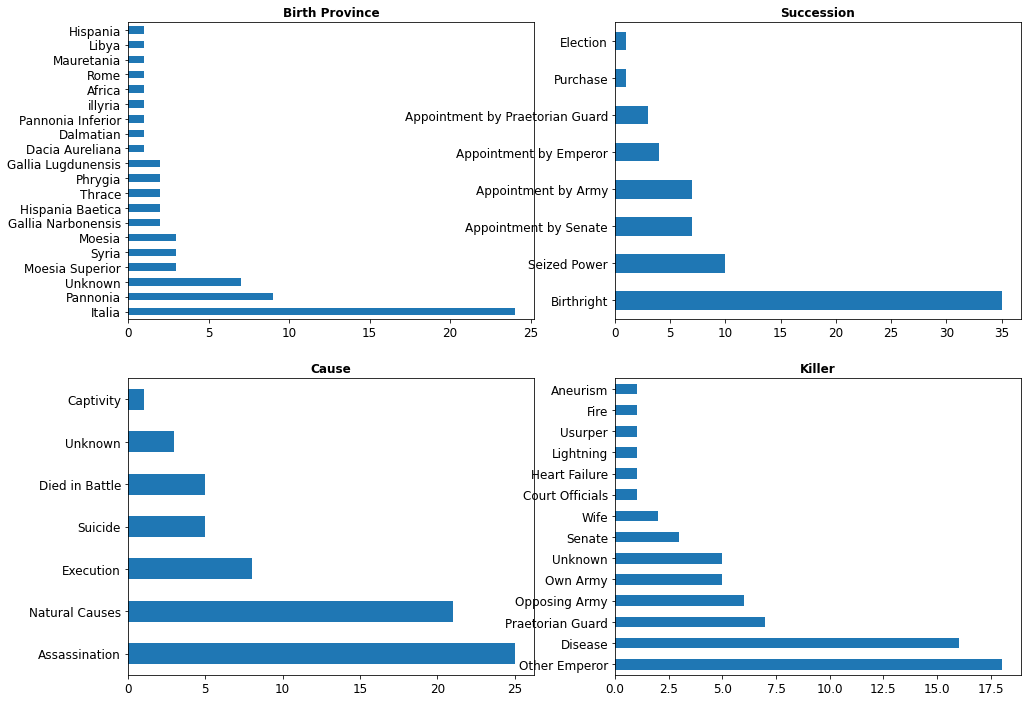

In [27]:
categorias = df[['Birth Province','Succession','Cause','Killer']]
graf_cat(categorias)

### Media de la edad de los emperadores

In [28]:
df['Age'].mean()

49.75

### Media de la edad de reinado

In [29]:
df['length of reign'].mean()

7.911764705882353

### ¿Qué Era fue la peor, en términos de peligro para los emperadores?

In [30]:
df['Era'].unique()

array(['Principate', 'Dominate'], dtype=object)